In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm # progress indicator
#import matplotlib
#matplotlib.use("nbagg")   #подключить эти пакеты для анимации

## Блок 1. Задаем потенциал и параметры сетки
## $\frac{U(\varphi)}{E_J}=\frac{(\varphi_x-\varphi)^2}{2l_q}+(1-\cos\varphi)$

In [85]:
# параметры сетки + значение phi
S = 5000 #размерность матрицы    
dx = 0.01 
L = dx*(S+2)# длина ящика для нулевых краевых условий
phix = 0 #при построение потенциала обл определения должна сдвигаться на phi
x = np.linspace(-L/2+dx+phix, L/2-dx+phix, S) # список x_i от -L/2+dx до L/2-dx
k = 1/(2*dx**2)
print('dx = {}, L = {}'.format(dx, L))
# параметры графика
width = 8
high = 6
#h = 1, m = 1

dx = 0.01, L = 50.02


In [86]:
S_test = 10000
L_test = L
dx_test =  L_test/(S_test+2)
x_test = np.linspace(-L_test/2+dx_test+phix, L_test/2-dx_test+phix, S_test) # список x_i от -L/2+dx до L/2-dx
k_test = 1/(2*dx_test**2)
print('dx_test = {}, L_test = {}'.format(dx_test, L_test))

dx_test = 0.0050009998000399925, L_test = 50.02


In [4]:
lq = 3
EJ = 1
 
def U(phi):
    return (phix - phi)**2/(2*lq) + 1 - np.cos(phi)

v = U(x)
v_test = U(x_test)

# вывод графика потенциала
#plt.figure(figsize=(width,high))
#plt.plot(x, v, color="green", label="V(x)")       
#plt.title("SQUID potential")
#plt.show()  

In [5]:
# надо получить значение, по которому будем получать E_max
# условие: энергия не должна превышать значение потенциала на концах
# решение: U_com = min(v[0], v[S-1])
U_comp = min(v[0], v[S-1])
print(U_comp)

104.1754638548032


## Блок 2. Собственные векторы и собственные значения
 

In [6]:
# построение матрицы Гамильтона
h = np.zeros((S,S))
for i in range(S-1):
    h[i+1][i] = -1*k
    h[i][i+1] = -1*k
for i in range(S):
    h[i][i] = 2*k + v[i]
#h[S-1][S-1]
print("1й, 2й и последний элементы диагонали:", h[0][0],h[1][1],h[-1][-1])

1й, 2й и последний элементы диагонали: 10104.175463854803 10104.093503864548 10104.175463854803


In [7]:
eigvals, eigvecs = np.linalg.eigh(h)

In [8]:
# построение тестовой матрицы Гамильтона
h_test = np.zeros((S_test,S_test))
for i in range(S_test-1):
    h_test[i+1][i] = -1*k_test
    h_test[i][i+1] = -1*k_test
for i in range(S_test):
    h_test[i][i] = 2*k_test + v_test[i]
#h[S-1][S-1]
print("1й, 2й и последний элементы диагонали:", h_test[0][0],h_test[1][1],h_test[-1][-1])

1й, 2й и последний элементы диагонали: 40088.22447327797 40088.183439516186 40088.22447327797


In [9]:
eigvals_test, eigvecs_test = np.linalg.eigh(h_test)

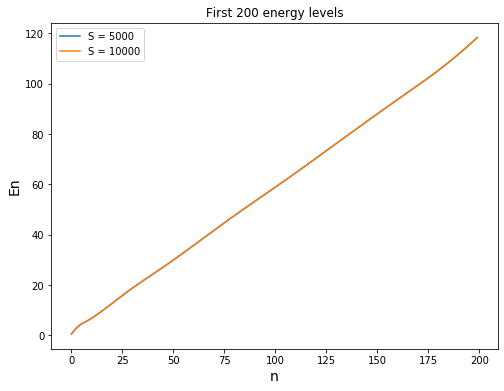

In [10]:
# построение зависимости энергии от номера уровня
# полезна чтобы на глаз определить примерный номер уровеня отсечения
en_plot_num = 200
plt.figure(figsize=(width,high))
plt.plot(eigvals[:en_plot_num], label="S = {}".format(S))
plt.plot(eigvals_test[:en_plot_num], label="S = {}".format(S_test))
plt.xlabel("n",size=14)
plt.ylabel("En",size=14)
plt.legend()
plt.title("First {} energy levels".format(en_plot_num))
plt.show()

### ВЫВОД
Первые уровни практически совпадают вне зависимости от количества точек разбиения

### Отсечение

In [11]:
# отступ от края должен быть постоянным или зависить от U_comp?
border = 5     # 0.05*U_comp
eigvals_new = list(filter(lambda x: x < U_comp - border, eigvals))
#print(eigvals_new)
N_trunc = len(eigvals_new) # уровень отсечения
print('Уровень отсечения N_trunc = {}'.format(N_trunc))

Уровень отсечения N_trunc = 170


### Сравнение энергий 

In [12]:
e_en = 0.05 # точности по энергии
E_trunc = eigvals[N_trunc]
E_trunc_test = eigvals_test[N_trunc]
en_diff = abs(E_trunc-E_trunc_test)
if en_diff < e_en:
    print('Разность энергий {} несущественна. Выбранное количество точек разбиения можно считать оптимальным'
          .format(en_diff))
else:
    print('Разность энергий {} чувствительна к изменению количества точек. Увеличь плотность точек на интервале'
          .format(en_diff))

Разность энергий 0.03523306731075593 несущественна. Выбранное количество точек разбиения можно считать оптимальным


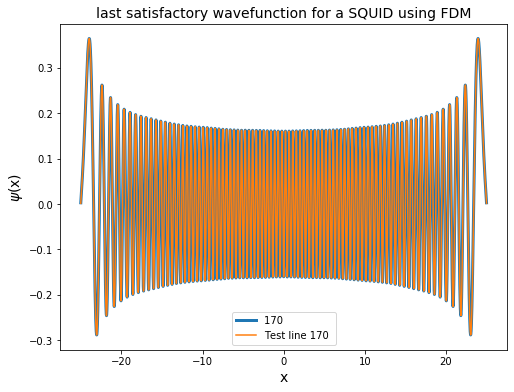

In [13]:
# построение psi_(N_trunc)
# !!! собственные векторы делятся на sqrt(dx) для восстановления волновой функции 
num = N_trunc
plt.figure(figsize=(width, high))
y = []
y = np.append(y, eigvecs[:,num]/np.sqrt(dx))
plt.plot(x, y,lw=3, label="{} ".format(num))
plt.plot(x_test, eigvecs_test[:,num]/np.sqrt(dx_test),label="Test line {} ".format(num))
plt.xlabel('x', size=14)
plt.ylabel('$\psi$(x)',size=14)
plt.legend()
plt.title('last satisfactory wavefunction for a SQUID using FDM',size=14)
plt.show()    


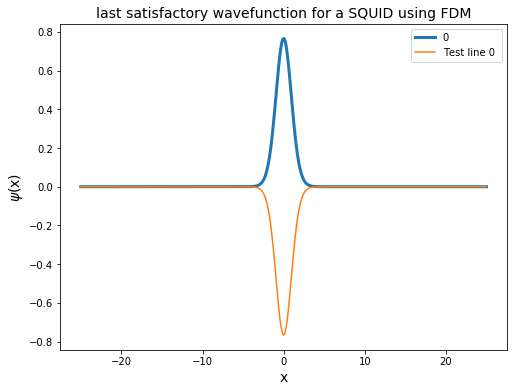

In [14]:
#построение psi_(0)
num = 0
plt.figure(figsize=(width, high))
y = []
y = np.append(y, eigvecs[:,num]/np.sqrt(dx))
plt.plot(x, y,lw=3, label="{} ".format(num)) 
plt.plot(x_test, eigvecs_test[:,num]/np.sqrt(dx_test),label="Test line {} ".format(num))
plt.xlabel('x', size=14)
plt.ylabel('$\psi$(x)',size=14)
plt.legend()
plt.title('last satisfactory wavefunction for a SQUID using FDM',size=14)
plt.show()    


### ???
Для сравнения двух векторов, они должны быть приведены к одной размерности. В данном же случае размерности отличаются в два раза. Что если интерволировать данные векоры функциями, а потом строить анализ, основанный на них?

In [15]:
from scipy.interpolate import interp1d
import scipy.integrate

In [16]:
# анализ для функций основного состояния
phi_0 = interp1d(x, eigvecs[0]*np.sqrt(dx), kind='cubic')
phi_0_test = interp1d(x_test, eigvecs_test[0]*np.sqrt(dx_test), kind='cubic')

func_dist = scipy.integrate.quad(lambda xx: np.abs(phi_0(xx)-phi_0_test(xx)), -L/2+dx, L/2-dx)
print('Абсолютное значение разности функций:', func_dist[0])

Абсолютное значение разности функций: 0.06037724598186029


C:\Users\Gorchavkina\anaconda3\lib\site-packages\ipykernel_launcher.py:5: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  """


In [17]:
# анализ для функций конечного состояния
phi_trunc = interp1d(x, eigvecs[N_trunc]*np.sqrt(dx), kind='cubic')
phi_trunc_test = interp1d(x_test, eigvecs_test[N_trunc]*np.sqrt(dx_test), kind='cubic')

func_dist = scipy.integrate.quad(lambda xx: np.abs(phi_trunc(xx)-phi_trunc_test(xx)), -L/2+dx, L/2-dx)
print('Абсолютное значение разности функций:', func_dist[0])

Абсолютное значение разности функций: 0.06376937439013426


C:\Users\Gorchavkina\anaconda3\lib\site-packages\ipykernel_launcher.py:5: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  """


## Заселяем произвольный уровень

Есть два варианта: либо поместить в чистое состояние, либо в суперпозицию. Начнем с первого.

In [18]:
n_init = 23 # начальный уровень
rho_init = np.zeros([N_trunc])
rho_init[n_init] = 1

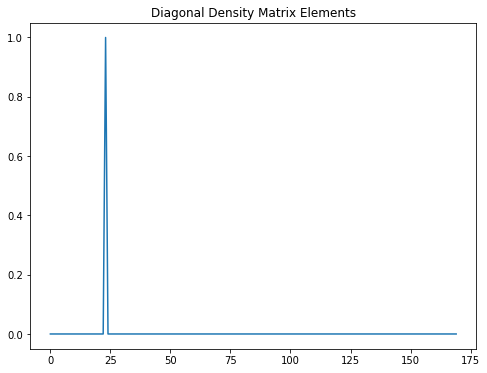

In [19]:
plt.figure(figsize=(width,high))
plt.plot(rho_init)       
plt.title("Diagonal Density Matrix Elements")
plt.show()
#rho_init

## Блок 3. Матрицы скоростей затухания
### $W_{mn}=\frac{2\pi}{\hbar^{2}}\left|<n|\hat{x}|m>\right|^2g(\omega_{m,n})k^2(\omega_{m,n})$

From Blum:

### $\frac{W_{mn}}{W_{nm}} = \frac{exp(-\beta E_m)}{exp(-\beta E_n)} \rightarrow W_{mn} = W_{nm}*exp(-\beta(E_m - E_n))$

## ???
1. Из вывода матричного алгоритма $\psi_i = \psi(x_i)$ - считается, что собственные векторы данной матрицы являются значением волновой функции в соответствующей точке.

2. В результате применения пакета linalg выполняется $\sum{\psi^2_i} = 1$. Следовательно, $\psi^2_i$ - вероятность обнаружить частицу в окресности dx точки $x_i$

3. Из теории эта же вероятность через непрерывную (реальную) полновую функцию равна $\psi^2(x_i)dx$. 
   Напрашивается соответствие $\psi_i = \psi(x_i)\sqrt{dx}$.

4. Имеет ли право на жизнь цепочка: 
    Если $\int\left|\psi(x)\right|^2dx = 1 \rightarrow \sum{\psi^2_i} = 1$, 
    то $\int\psi_n(x)x\psi_m(x)dx \rightarrow \sum{\psi_n(x_i)x_i\psi_m(x_i)}$?
    (Тут использовалось обозначение $\psi_i = \psi(x_i)$)

5. $<n|\hat{x}|m> = \sum_{i=0}^{S-1}{\psi_n(x_i)x_i\psi_m(x_i)}$

$\dot{\rho} = \text{прирост в }|m> - \text{ убыль из }|m>$.
Запрещены переходы к более высокому уровню. То есть в $W_{ij}$ всегда $i<j$: треугольная матрица с заполненным верхним правым углом. 

 

In [40]:
gamma = 0.01 
const = gamma*2*np.pi
###############################################
# возвращает квадрат модуля матричного элемента x
###############################################

def squred_abs(n, m, x): 
    n_ket = eigvecs[n]
    m_bra = eigvecs[m] 
    integ = sum(n_ket*x*m_bra)
    return np.abs(integ)**2
#print(squred_abs(1, 2, x))

################################################
# Заполнение матриц W
################################################
W = np.zeros([N_trunc, N_trunc])
for i in tqdm(range(N_trunc)):
    for j in range(N_trunc):
        if i<j: 
            W[i][j] = const*squred_abs(j, i, x)

100%|████████████████████████████████████████████████████████████████████████████████| 170/170 [00:32<00:00,  5.19it/s]


In [41]:
###############################################
# то же самое, но тестоове
###############################################
def squred_abs_test(n, m, x): 
    n_ket = eigvecs_test[n]
    m_bra = eigvecs_test[m] 
    integ = sum(n_ket*x_test*m_bra)
    return np.abs(integ)**2

W_test = np.zeros([N_trunc, N_trunc])
for i in tqdm(range(N_trunc)):
    for j in range(N_trunc):
        if i<j: 
            W_test[i][j] = const*squred_abs_test(j, i, x)

100%|████████████████████████████████████████████████████████████████████████████████| 170/170 [01:03<00:00,  2.66it/s]


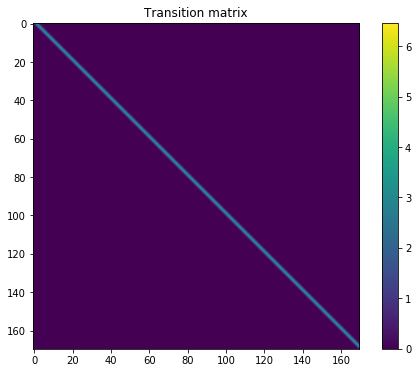

In [42]:
plt.figure(figsize=(width,high))
plt.imshow(W, interpolation="bicubic")
plt.title("Transition matrix")
plt.colorbar()
plt.show()

$W_m = \sum_{n}W_{nm}$ (вектор)

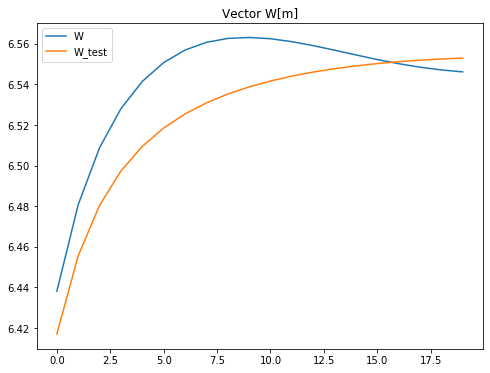

In [48]:
def Wm(W): #функция выдает вектор
    w = []
    for m in range(N_trunc):
        s = 0
        for n in range(N_trunc):
            s += W[n][m]
        w.append(s)
    return w

lis = np.array(Wm(W))
lis_test = np.array(Wm(W_test))

plt.figure(figsize=(width, high))
plt.title('Vector W[m]')
plt.plot(lis[5:25], label = 'W')     
plt.plot(lis_test[5:25], label = 'W_test')
plt.legend()
plt.show()

# обсуждалось, что график должен постепенно возрастать. сейчас мне это неочевидно, ведь суммирование идет  
# по строкам при фиксированном столбце. 
# а чем дальше от диагонили, тем менее значимым будет вклад элементов. 
# логично, что с некоторого уровня начнеться "насыщенность"

In [49]:
W_diff = np.max(np.abs(lis-lis_test))
print('Максимальное различие между текущим и тестовым значениями вектора W[m]:', W_diff)

Максимальное различие между текущим и тестовым значениями вектора W[m]: 0.032198168318188


### Вывод: 
Текущее и тестовое значения вектора W довольно сильно отличаются в интервале перегиба. К тому же, у тестового вектора слабее осцилляции


### Уравнение Паули
$\dot{\rho}(t)_{mm} = \sum_{n \neq m}{\rho(t)_{nn}W_{mn}} - \rho(t)_{mm}\sum_{n \neq m}{W_{nm}}$

### Метод Рунге-Кутты IVго порядка

$\frac{d\rho}{dt}=f(t, \rho(t))$

$\rho(t_0)=\rho_0$

$\rho_{i+1} = \rho_{i}+\frac{h}{6}(k_1+2k_2+2k_3+k_4)$

$k_1 = f(t_i, \rho_i)$

$k_2 = f(t_i+\frac{h}{2}, \rho_i+\frac{h}{2}k_1)$

$k_3 = f(t_i+\frac{h}{2}, \rho_i+\frac{h}{2}k_2)$

$k_4 = f(t_i+h, \rho_i+hk_3)$, $i = 0, ..., n-1$.

Примечание: в рассматриваемом случае функция $f(\rho(t))$, но не зависит от времени явно. 
 

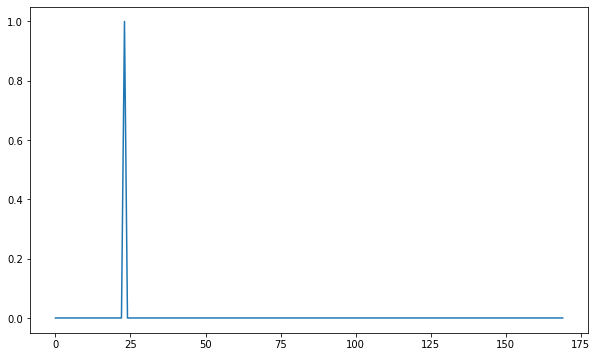

In [72]:
rho_curr = rho_init
# Initialize animated plot
# ---------------------------------------------------------------
fig = plt.figure(figsize=(10,6))
plt.plot(rho_curr) #, interpolation="bicubic", cmap=plt.cm.RdBu)
#plt.title('Fourier Method', size=14)
#plt.colorbar()
#plt.ion()   # set interective mode
plt.show()

In [73]:
dt = 0.005
L = 10  
nt = int(L/dt)
iplot = 20
save_all = []
print("Количество итераций по времени: {}".format(nt))

def pauli_vec_func(rho, W):  # принимает на вход распределение и W, на выходе  
    res = []
    for m in range(N_trunc):
        plus = 0
        minus = 0
        for n in range(N_trunc):
            plus += rho[n]*W[m][n]
            minus += W[n][m]
        minus = minus*rho[m]
        res.append(plus - minus)
    return np.array(res)

rho_new = np.zeros([N_trunc])
for t in tqdm(range(nt+1)):
    k1 = pauli_vec_func(rho_curr, W)
    k2 = pauli_vec_func(rho_curr + (dt/2)*k1, W)
    k3 = pauli_vec_func(rho_curr + (dt/2)*k2, W)
    k4 = pauli_vec_func(rho_curr + dt*k3, W)
    rho_new = rho_curr + dt*(k1 + 2*k2 + 2*k3 + k4)/6
    save_all.append(rho_new)
    #if not t % iplot:                    
        # Display Solution
        # -------------------------------------- 
     #   plt.plot(rho_new) #, interpolation="bicubic", cmap=plt.cm.RdBu) 
     #   plt.title("T = {}".format(t*dt))
     #   plt.gcf().canvas.draw()
    
    rho_curr = rho_new
    

  0%|                                                                                         | 0/2001 [00:00<?, ?it/s]

Количество итераций по времени: 2000


100%|██████████████████████████████████████████████████████████████████████████████| 2001/2001 [11:00<00:00,  3.03it/s]


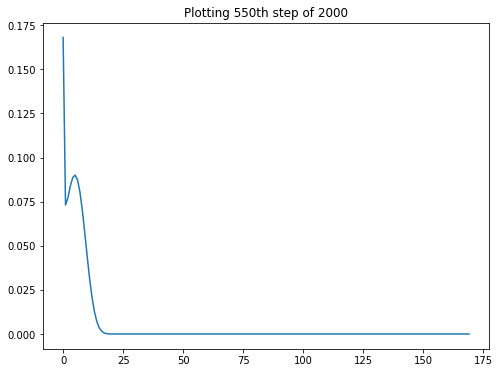

In [83]:
n_plot = 550 
plt.figure(figsize=(width, high))
plt.title('Plotting {}th step of {}'.format(n_plot, nt))
plt.plot(save_all[n_plot])       
plt.show() 

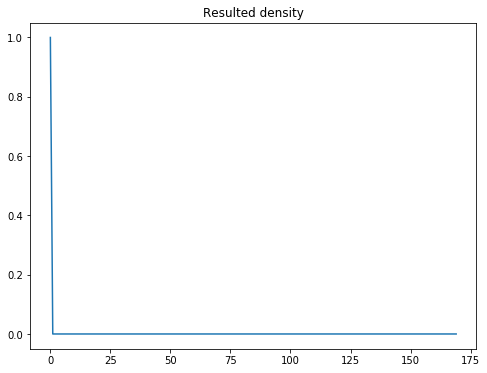

In [75]:
plt.figure(figsize=(width, high))
plt.plot(rho_new)       
plt.title('Resulted density')
plt.show() 

In [76]:
# check of normalazing
e = 0.000000001
z = np.sum(rho_new)
if (abs(1-z)<e):
    print("Норма сохраняется")
else:
    print("Ошибка: норма не сохраняется")

Норма сохраняется


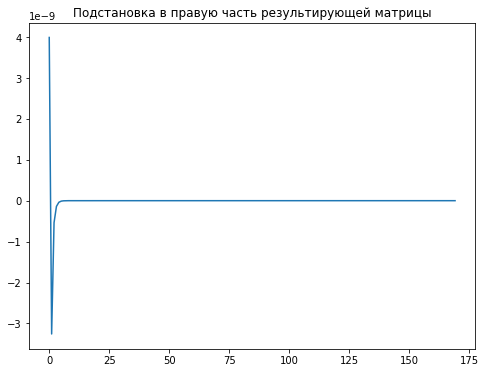

In [77]:
plt.figure(figsize=(width, high))
plt.plot(pauli_vec_func(rho_new, W))       
plt.title('Подстановка в правую часть результирующей матрицы')
plt.show() 